In [53]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [54]:
import json
from pathlib import Path
import pandas as pd

def read_experiment_results(base_dir="experiment2_3layers"):
    results = []
    base_path = Path(base_dir)
    pca_dirs = sorted(base_path.glob("pca_comps*"),
                     key=lambda x: int(x.name.replace("pca_comps", "")))
    
    for pca_dir in pca_dirs:
        results_file = pca_dir / "results_summary.json"
        
        if not results_file.exists():
            continue
        
        with open(results_file, 'r') as f:
            data = json.load(f)
        
        result_dict = {
            'pca_components': data['pca_components'],
            'perplexity_change': data['perplexity_change'],
            'perplexity_ratio': data['perplexity_ratio'],
        }
        
        total_var_explained = 0
        for layer_key, layer_data in data['explained_variance'].items():
            var_sum = layer_data['explained_variance_ratio_sum']
            result_dict[f'{layer_key}_var_explained'] = var_sum
            total_var_explained += var_sum
        
        # result_dict['total_var_explained'] = total_var_explained
        results.append(result_dict)
    
    df = pd.DataFrame(results)
    df = df.sort_values('pca_components')
    return df

In [55]:
results = read_experiment_results()

In [56]:
results

,pca_components,perplexity_change,perplexity_ratio,layer_7_var_explained,layer_14_var_explained,layer_21_var_explained
0,8,5.725022,1.568298,0.132169,0.203072,0.152022
1,16,5.509479,1.546902,0.204671,0.261812,0.224176
2,32,5.201256,1.516306,0.299379,0.343111,0.319152
3,64,4.741682,1.470686,0.417984,0.453459,0.443847
4,128,4.246947,1.421576,0.565589,0.590154,0.592469
5,256,3.395059,1.337013,0.731846,0.743792,0.750379


Text(0, 0.5, 'Perplexity - baseline')

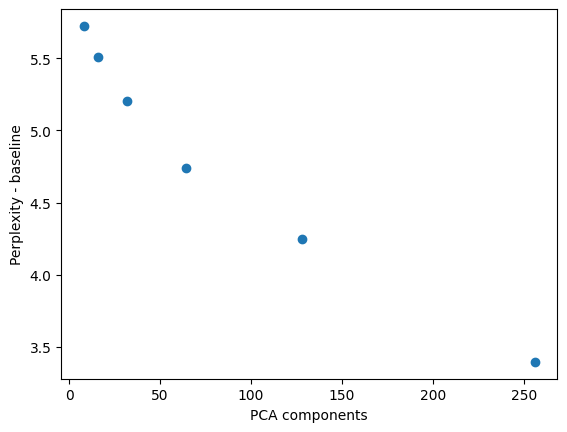

In [57]:
plt.plot(results["pca_components"], results["perplexity_change"], "o")
plt.xlabel("PCA components")
plt.ylabel("Perplexity - baseline")

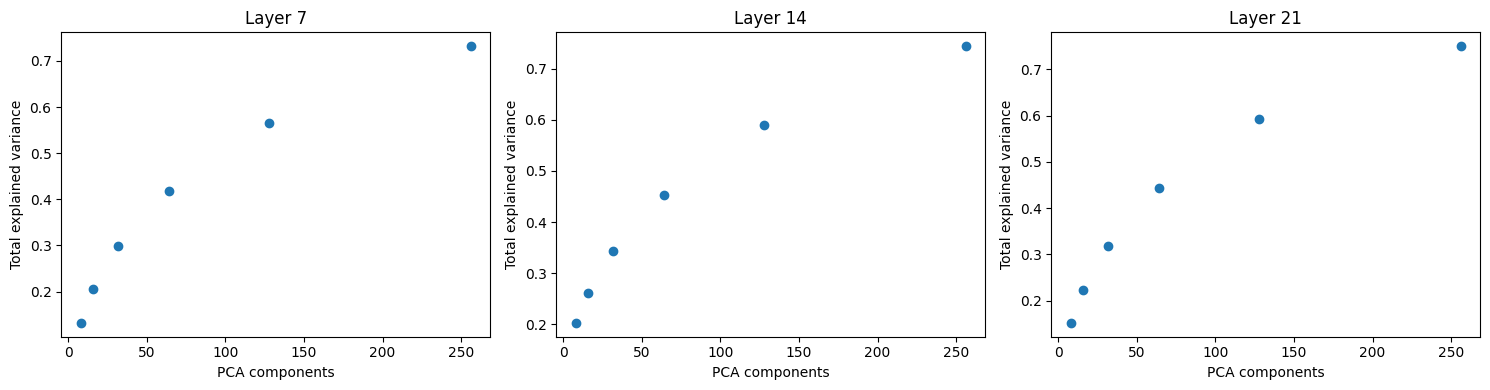

In [59]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].plot(results["pca_components"], results["layer_7_var_explained"], "o")
axes[0].set_xlabel("PCA components")
axes[0].set_ylabel("Total explained variance")
axes[0].set_title("Layer 7")

axes[1].plot(results["pca_components"], results["layer_14_var_explained"], "o")
axes[1].set_xlabel("PCA components")
axes[1].set_ylabel("Total explained variance")
axes[1].set_title("Layer 14")

axes[2].plot(results["pca_components"], results["layer_21_var_explained"], "o")
axes[2].set_xlabel("PCA components")
axes[2].set_ylabel("Total explained variance")
axes[2].set_title("Layer 21")

plt.tight_layout()